In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift 

from classicalfield_orig import FiniteTempGPE as gpe

The following code runs until total time = 200 with a dt half that of the dt from the long simulation and a potential well that is double the height of the potential height from the long simulation 

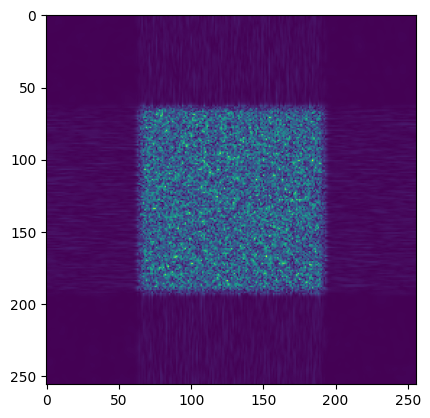

In [34]:
imported_data = np.loadtxt('output.csv', dtype = np.complex_)
plt.imshow(np.abs(imported_data))

In [ ]:
g_2 = gpe(npoints = 2**7, numImagSteps = 2000, numRealSteps = 2000000, dtcoef = 0.0005, Nsamples = 1, runAnim = True, animFileName = 'longeranimbox_smallerdt.mp4', Tfact = 1/2, dst = False)

No vortices to be spawned
Total Imag Time:  9.108791828155518
kmax:  8.042477193189871
T:  16.170359850744806


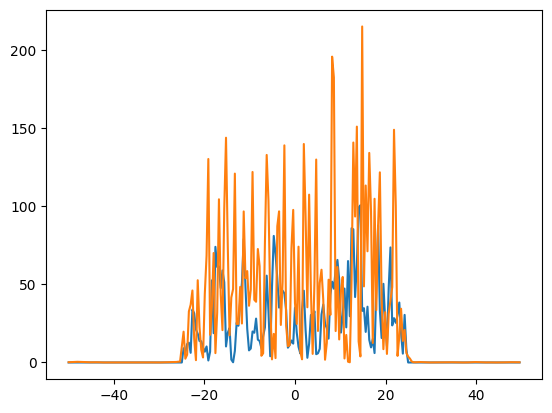

In [10]:
plt.figure() 
plt.plot(g_2.xi[0][0], np.abs(g_2.snaps[0][len(g_2.snaps[0])//2])**2)
plt.plot(g_2.xi[0][0], np.abs(g_2.snaps[-1][len(g_2.snaps[-1])//2])**2)

In [15]:
print(np.shape(g_2.snaps))

(4197, 256, 256)


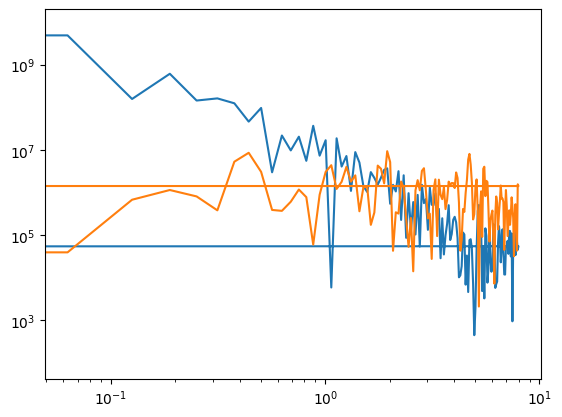

In [39]:
plt.figure() 
plt.plot(g_2.ki[0][0], np.abs(fft2(g_2.snaps[0])[0])**2)
plt.plot(g_2.ki[0][0], np.abs(fft2(g_2.snaps[-1])[0])**2)
plt.yscale('log')
plt.xscale('log')

In [36]:
# save txt 
np.savetxt('output.csv', g_2.snaps[-1])

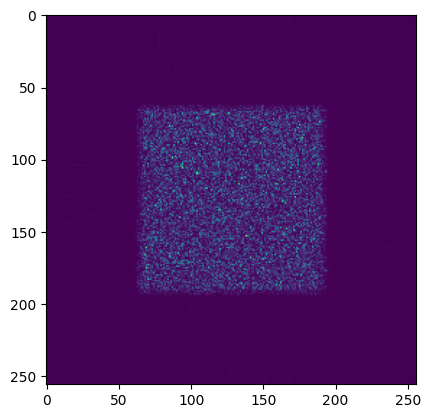

In [37]:
plt.figure() 
plt.imshow(np.abs(g_2.snaps[-1])**2)

In [28]:
g = g_2

In [30]:
print("Temperature: ", g.T)
# KE ~ 32 
print("dt: ", g.gpeobj.dt)
print("PE: ", np.max(g.gpeobj.Vbox))
# Eventually increase V once you can reproduce earlier results in the other file 
print("KE: ", (np.pi/g.dx)**2/2)
print("Interaction Energy: " , g.gpeobj.g * 50)
print("Total Time: ", g.gpeobj.dt * g.numRealSteps)
print("Number of Atoms", g.gpeobj.Natoms)

Temperature:  16.170359850744806
dt:  0.00019073486328125
PE:  64.68143940297922
KE:  32.34071970148961
Interaction Energy:  0.9765625
Total Time:  200.08087158203125
Number of Atoms 128000


In [31]:
100/g.gpeobj.dt

524288.0